In [18]:
%matplotlib inline
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, tanh, sqrt, cos, cosh, sinh, sin

In [21]:
def delta (tau):
    """
    Returning BCS delta normalized on pi*kB*Tc as function of T/Tc
    """
    return 0.56*np.tanh(1.74*np.sqrt(1/tau-1))

def Integral(mu, n, xhi, tau, l):
    """
    Calculate function under the integral
    Calculate Q at point (xhi, tau, n)
    tau - dimeshionless temperature, tau=T/Tc
    n - denotes Matsubara frequency
    l - denotes L in terms of xsi
    xhi - phase
    """
    q1 = 1 + (2*(tau**2)*(2*n+1)**2)/(delta(tau)**2)
    q2 = (2*tau*(2*n+1)*np.sqrt((tau**2)*(2*n+1)**2 + delta(tau)**2))/(delta(tau)**2)
    phi = (tau*(2*n+1)*l)/mu
    Q = np.cos(xhi) + q1*np.cosh(phi) + q2*np.sinh(phi)
    return mu/abs(Q)

def matsub_sum(xhi, tau, l, limit=50):
    """
    Summation over Matsubara frequencies from 0 to some limit of n frequency
    Я пока не оценивал частоту для обрезки, для теста поставил пока 50
    """
    omega_sum = 0
    for n in range(limit):
        omega_sum += quad(Integral, 0, 1, args=(n, xhi, tau, l))[0]
    return omega_sum

def J_vs_tau (tau, xhi, l):
    """
    Returns dimentionless J at concrete tau and xhi
    """
    J = tau * sin(xhi) * matsub_sum(xhi, tau, l) 
    return J

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in cosh
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in sinh
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars


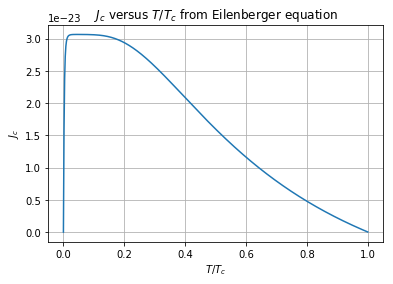

In [25]:
#-----------------------------
# constants
h = 1.054e-34 # J/s
e = 1.6e-19 # C
n = 10e-23 # concentration
kf = (3*(pi**2)*n)**(0.33)
kb = 1.38e-23 # J/K
Tc = 1 # K
#------------------------------

J_pref = (2*e*(kf**2)*kb*Tc)/(pi*h) # Dimention prefactor of current density

N = 1000 # number of points
l = 1 # in terms of xsi
xhi = pi/2 # just for test I choosed pi/2 as it for sin(xhi) function

tau = []
Jc = []

for t in range(N):
    eps = np.finfo(float).eps # eps that I add to avoid zero divison
    tau.append(t/N + eps) 
    J = J_vs_tau(t/N + eps, xhi, l)*J_pref
    Jc.append(J)
    
fig, ax = plt.subplots()
ax.plot(tau, Jc)

ax.set(xlabel=r'$T/T_{c}$', ylabel=r'$J_{c}$',
       title=r'$J_{c}$ versus $T/T_{c}$ from Eilenberger equation')
ax.grid()

plt.show()